## Clustering

Modified from coursera/machine learning with python

### Load necessary libraries

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

### Load dataset
Using two columns of the IRIS dataset without label as example

In [6]:
classification_dir = "Data/Classification/IRIS/"
data = pd.read_csv(classification_dir + 'IRIS.csv')
df = data[['sepal_length', 'petal_width']]
label = data['species']

In [5]:
df.head()


,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


### Exploratory Data Analysis

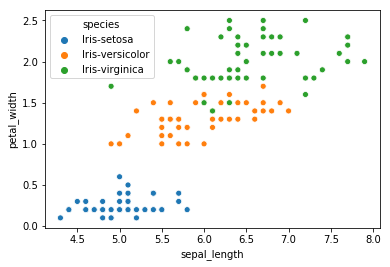

In [13]:
# clusters with true labels
sns.scatterplot(df['sepal_length'], df['petal_width'], hue=label)

### K-means

In [14]:
"""
initialize kmeans:
init - initialization method of the centroids
n_clusters - nuber of clusters
n_init - number of time the k-means algo will be run with different centroid seeds
"""
k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)

k_means.fit(df)

# take labels and centroids from kmeans
kmeans_label = k_means.labels_
kmeans_centroids = k_means.cluster_centers_

visualize the result

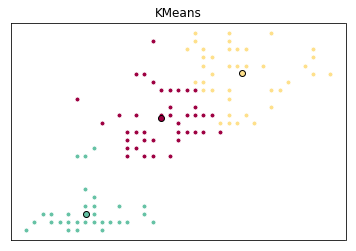

In [63]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

colors = plt.cm.Spectral(np.linspace(0, 0.8, len(set(kmeans_label))))

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(3), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = list(kmeans_label == k)

    # Define the centroid, or cluster center.
    cluster_center = kmeans_centroids[k]

    # Plots the data points with color col.
    ax.plot(df.loc[my_members, 'sepal_length'], df.loc[my_members, 'petal_width'], 'w', markerfacecolor=col, marker='.', markersize = 10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

### Agglomerative Clustering

In [43]:
"""
Agglomerative Clustering
n_clusters - number of clusters
linkage - linkage criterion. 'complete', 'average', 'ward', 'single'
"""
agglom = AgglomerativeClustering(n_clusters=3, linkage='average')
agglom.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [44]:
# take labels from kmeans
agglom_label = agglom.labels_

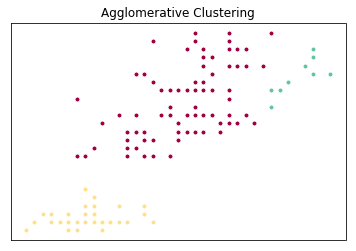

In [64]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

colors = plt.cm.Spectral(np.linspace(0, 0.8, len(set(kmeans_label))))

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(3), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = list(agglom_label == k)

    # Plots the data points with color col.
    ax.plot(df.loc[my_members, 'sepal_length'], df.loc[my_members, 'petal_width'], 'w', markerfacecolor=col, marker='.', markersize = 10)

# Title of the plot
ax.set_title('Agglomerative Clustering')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

### Density-Based Clustering
DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [52]:
"""
DBSCAN
epsilon - a specified radius that if includes enough number of points within, also called dense area
minimumSamples - the minimum number of data points in a neighborhood to define a cluster
"""

epsilon = 0.3
minimumSamples = 5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(df)
db_label = db.labels_

#### Distinguish outliers
Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [53]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_label)) - (1 if -1 in db_label else 0)

# Remove repetition in labels by turning it into a set.
unique_labels = set(db_label)


#### Data visualization

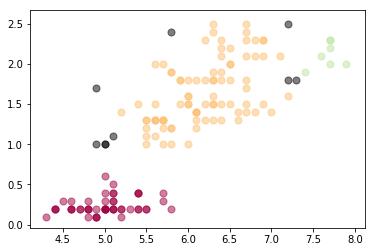

In [55]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
ddf = np.array(df)

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (db_label == k)

    # Plot the data points that are clustered
    xy = ddf[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = ddf[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)